# BANK PAYMENTS FRAUD DETECTION

In [157]:
#STEP 1

#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#set to display all columns in the datset
pd.set_option("display.max_columns",None)

import pandasql as psql

In [158]:
#STEP 2
#Loading the dataset
bankdata1=pd.read_csv(r"C:\Users\PUJITHA\bs140513_032310.csv",header=0)

#Backup the original pandas dataframe
bankdata1_bk=bankdata1.copy()

#Displaying first 5 records of dataframe
bankdata1.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [159]:
bankdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [160]:
Q1 = psql.sqldf("select * from bankdata1 where fraud = 1 ")

In [161]:
Q2 = psql.sqldf("select * from bankdata1 where fraud = 0 ")


In [162]:
bank_new = bankdata1.groupby('fraud', group_keys=False).apply(lambda x: x.sample(frac=0.155))

In [163]:
bankdata = Q1.append(bank_new, ignore_index=True)

In [164]:
bankdata.shape

(99370, 10)

In [165]:
#Display dataset information
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99370 entries, 0 to 99369
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         99370 non-null  int64  
 1   customer     99370 non-null  object 
 2   age          99370 non-null  object 
 3   gender       99370 non-null  object 
 4   zipcodeOri   99370 non-null  object 
 5   merchant     99370 non-null  object 
 6   zipMerchant  99370 non-null  object 
 7   category     99370 non-null  object 
 8   amount       99370 non-null  float64
 9   fraud        99370 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [166]:
#count the target variable(fraud) by 0 or 1
#and if their (>=10:1 then it is imbalanced datset)
Target_count=bankdata.fraud.value_counts()
print(Target_count)
print('Class 0:',Target_count[0])
print('Class 1:',Target_count[1])
print('Proportion:',round(Target_count[0]/Target_count[1],2),':1')
print('Total bank records:',len(bankdata))  #imbalanced dataset

0    91054
1     8316
Name: fraud, dtype: int64
Class 0: 91054
Class 1: 8316
Proportion: 10.95 :1
Total bank records: 99370


In [167]:
#Label Encoder can be used to normalize the variables.It can also be used to transform non-numerical(categorical)to numerical labels.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

#Fit Label Encoder and return encoded labels
bankdata['gender']=LE.fit_transform(bankdata[['gender']])
bankdata['age']=LE.fit_transform(bankdata[['age']])
bankdata['category']=LE.fit_transform(bankdata[['category']])
bankdata['customer']=LE.fit_transform(bankdata[['customer']])
bankdata['merchant']=LE.fit_transform(bankdata[['merchant']])

In [168]:
#Display dataset information
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99370 entries, 0 to 99369
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         99370 non-null  int64  
 1   customer     99370 non-null  int32  
 2   age          99370 non-null  int32  
 3   gender       99370 non-null  int32  
 4   zipcodeOri   99370 non-null  object 
 5   merchant     99370 non-null  int32  
 6   zipMerchant  99370 non-null  object 
 7   category     99370 non-null  int32  
 8   amount       99370 non-null  float64
 9   fraud        99370 non-null  int64  
dtypes: float64(1), int32(5), int64(2), object(2)
memory usage: 5.7+ MB


In [169]:
#Deleting the variables which does not impact target variable

del bankdata['zipMerchant']
del bankdata['zipcodeOri']

In [170]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99370 entries, 0 to 99369
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      99370 non-null  int64  
 1   customer  99370 non-null  int32  
 2   age       99370 non-null  int32  
 3   gender    99370 non-null  int32  
 4   merchant  99370 non-null  int32  
 5   category  99370 non-null  int32  
 6   amount    99370 non-null  float64
 7   fraud     99370 non-null  int64  
dtypes: float64(1), int32(5), int64(2)
memory usage: 4.2 MB


Text(0, 0.5, 'Frequency')

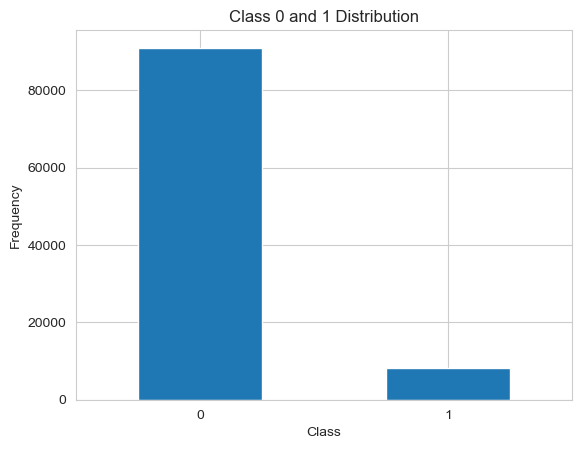

In [171]:
count_classes=pd.value_counts(bankdata['fraud'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Class 0 and 1 Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [172]:
bankdata.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

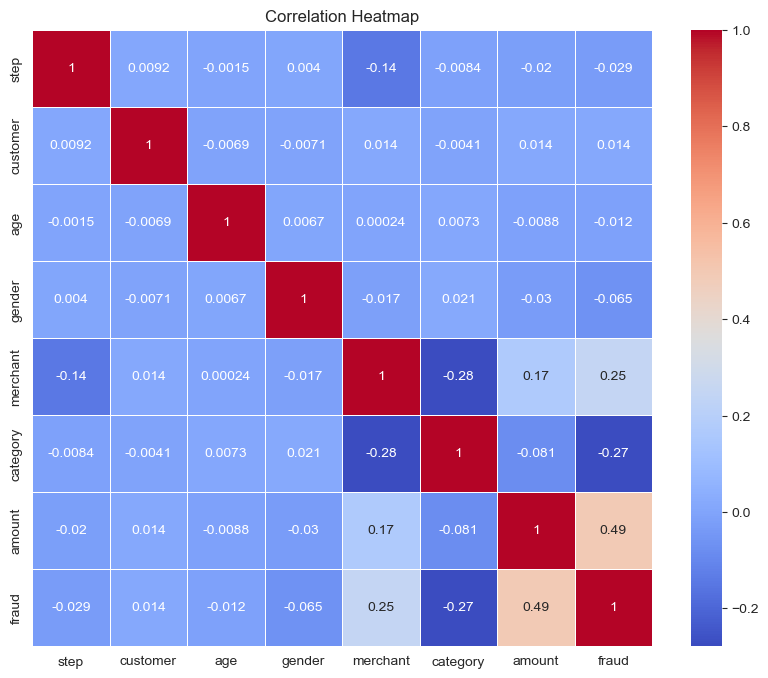

In [173]:
# Specify the target variable and independent variables
target_variable = 'fraud'  # Replace with the actual target variable name
independent_variables = ['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = bankdata[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [174]:
bankdata.corrwith(bankdata['fraud'])

step       -0.029301
customer    0.013677
age        -0.012295
gender     -0.064550
merchant    0.247041
category   -0.274495
amount      0.492540
fraud       1.000000
dtype: float64

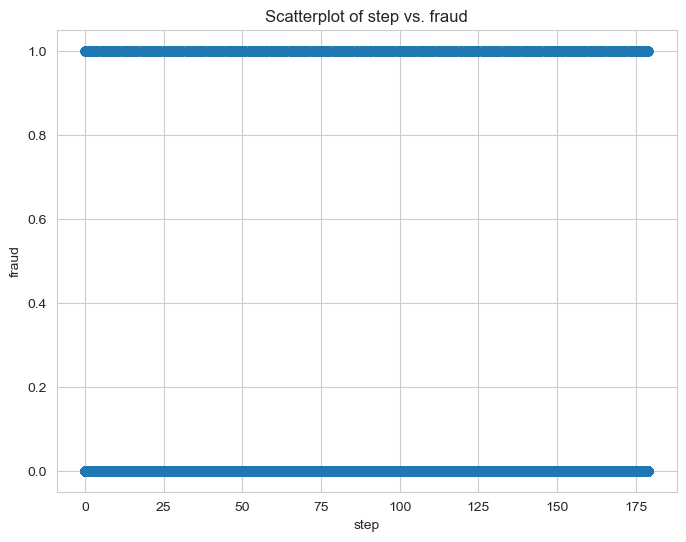

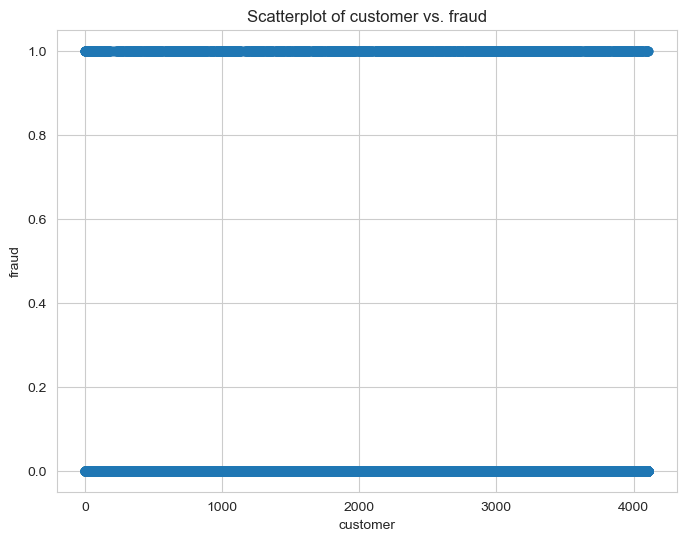

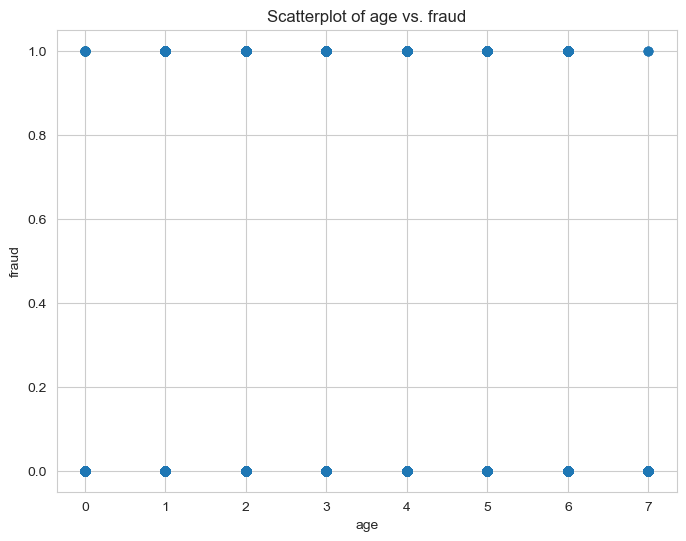

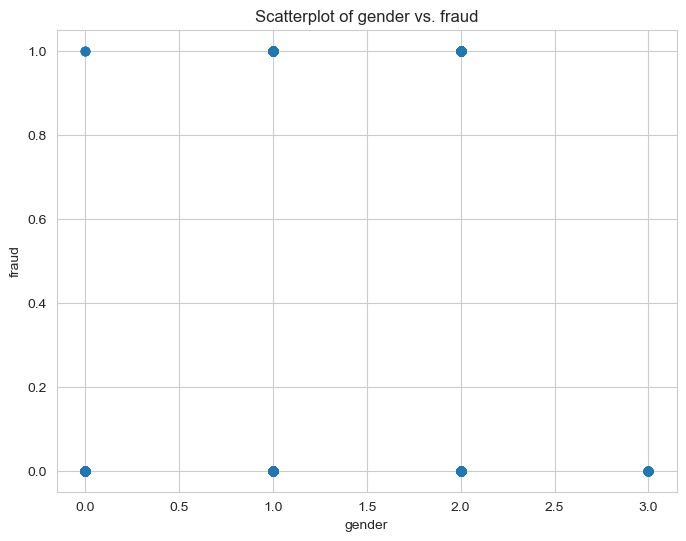

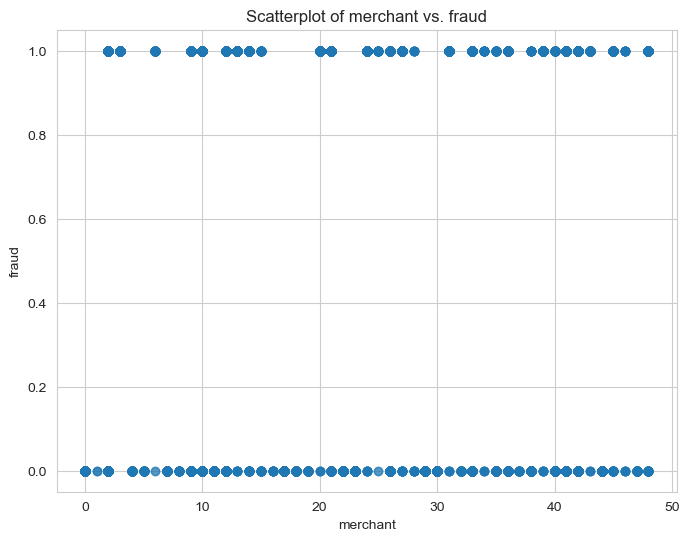

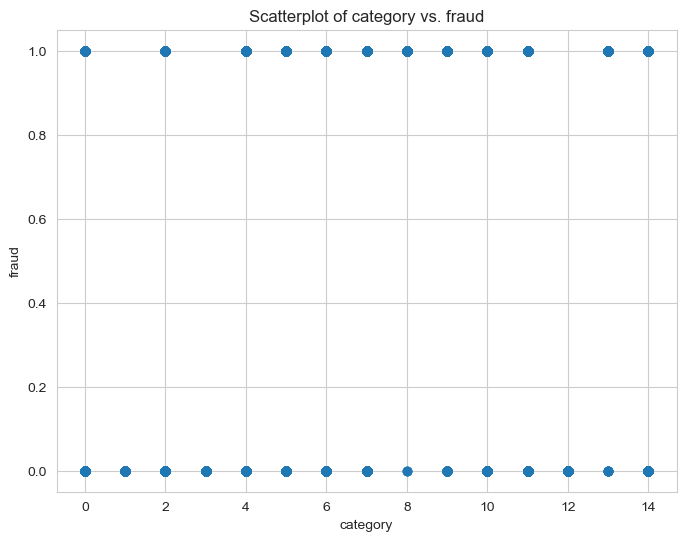

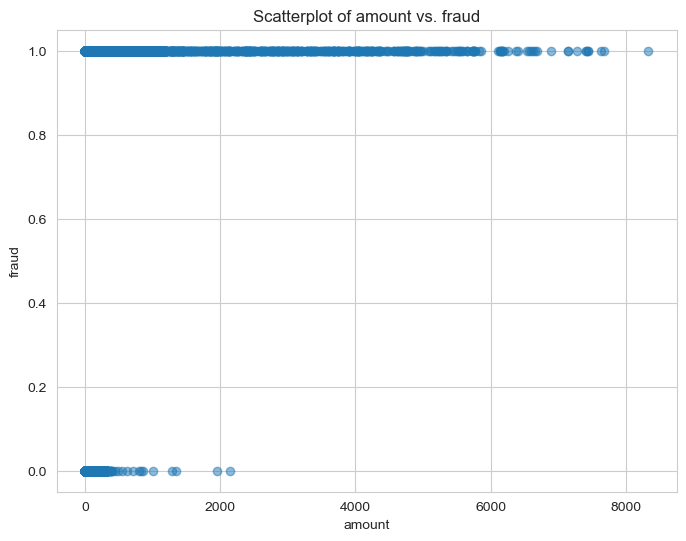

In [179]:
# Specify the target variable and independent variables
target_variable = 'fraud'  # Replace with the actual target variable name
independent_variables = ['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount']  # Replace with the actual independent variable names

# Create scatterplots for each independent variable
for independent_var in independent_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(bankdata[independent_var], bankdata[target_variable], alpha=0.5)
    plt.xlabel(independent_var)
    plt.ylabel(target_variable)
    plt.title(f'Scatterplot of {independent_var} vs. {target_variable}')
    plt.grid(True)
    plt.show()

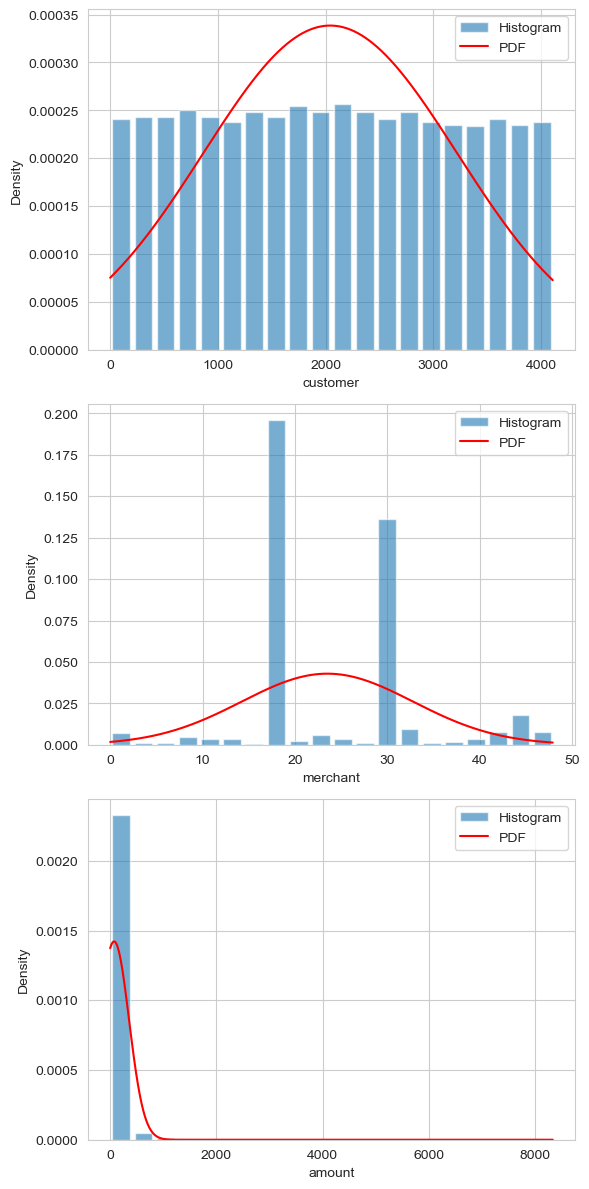

In [180]:
# to know if the data is normally distributed or not
from scipy.stats import norm#normial data we have to take
variables_to_plot = ['customer','merchant','amount']

# Create a new figure
fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(6, 4 * len(variables_to_plot)))

# Iterate through the list of variables
for i, variable in enumerate(variables_to_plot):
    # Plot histogram with bars
    axs[i].hist(bankdata[variable], bins=20, rwidth=0.8, density=True, alpha=0.6, label='Histogram')
    
    # Plot PDF of normal distribution
    rng = np.arange(bankdata[variable].min(), bankdata[variable].max(), 0.1)
    axs[i].plot(rng, norm.pdf(rng, bankdata[variable].mean(), bankdata[variable].std()), 'r-', label='PDF')
    
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Density')
    axs[i].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
#if it is not distribute we have to apply the IQR

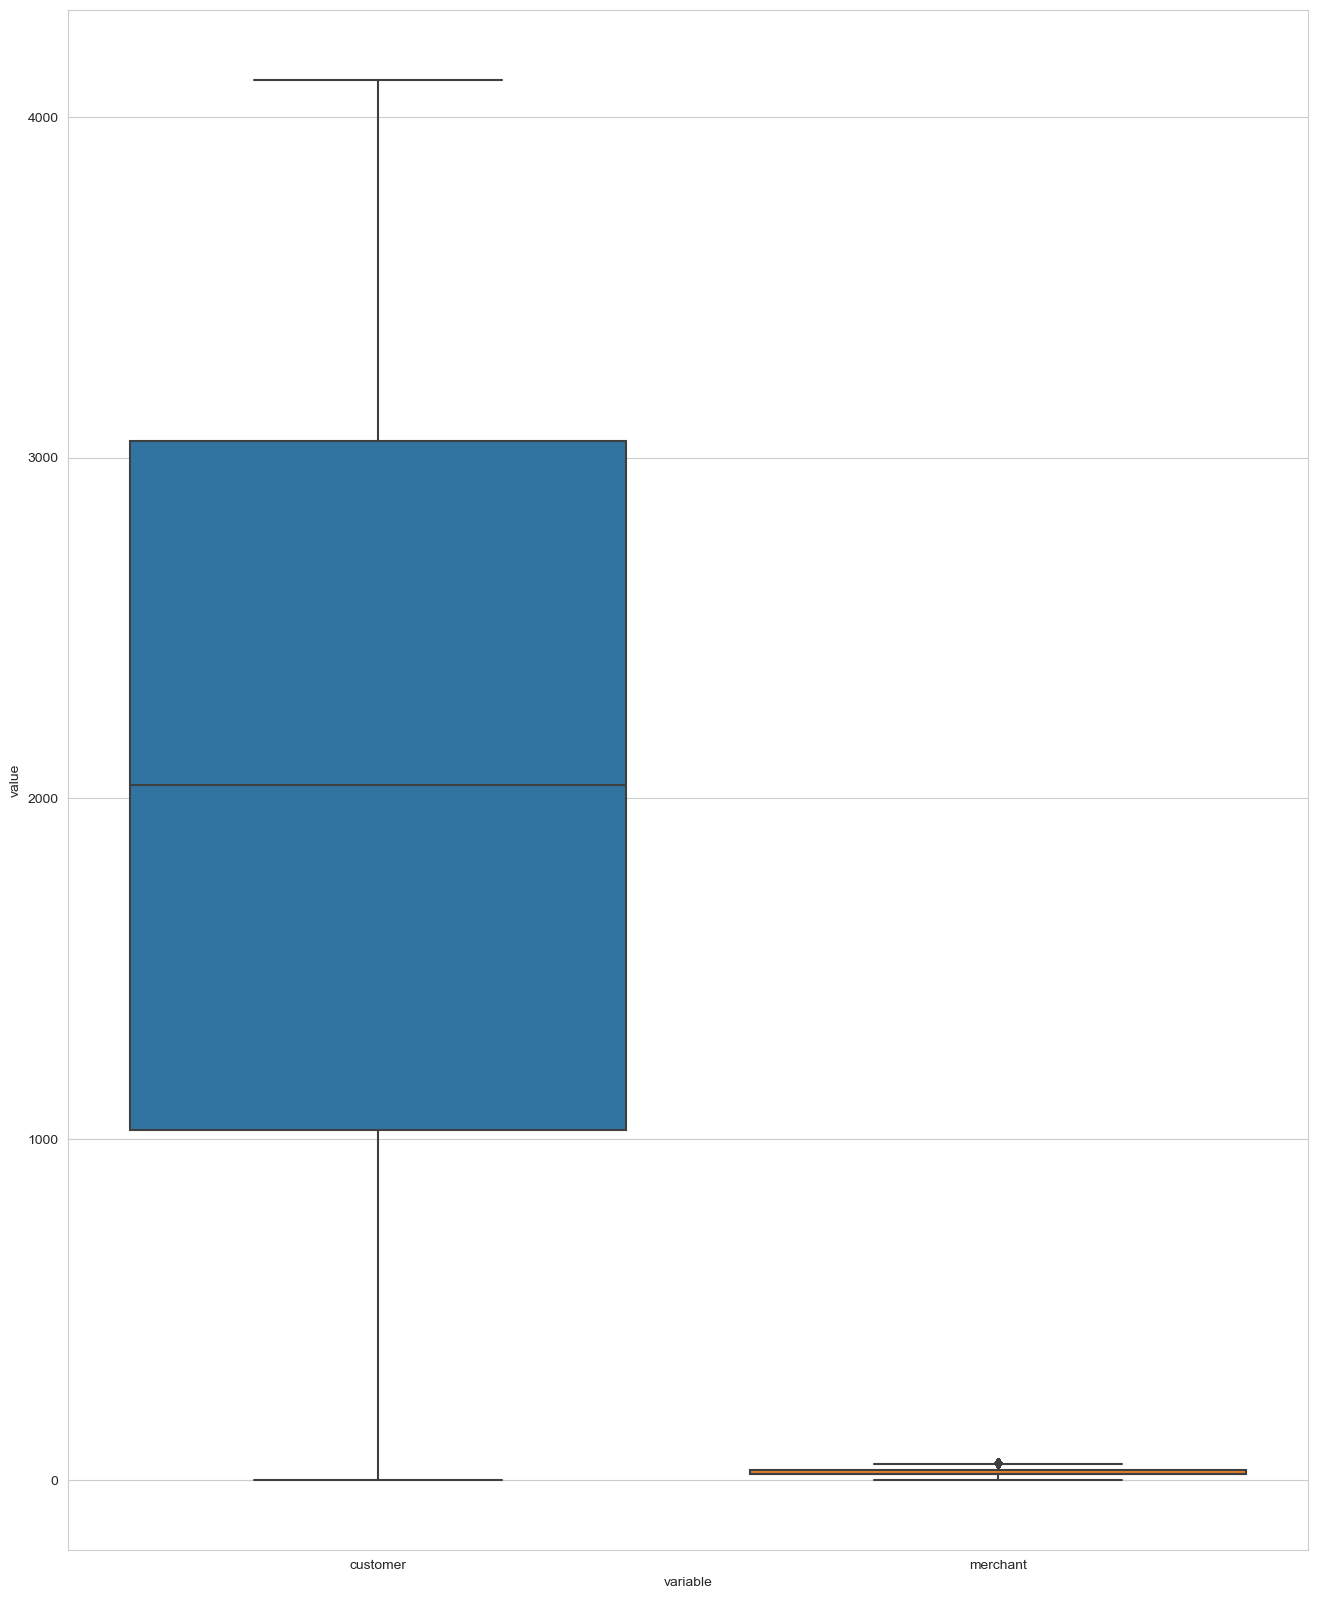

In [181]:
#BOXPLOTS
cols=['customer','merchant']
plt.figure(figsize=(16, 20))
df = pd.DataFrame(data = bankdata, columns = cols)
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [182]:
#Displaying the duplicated data

bankdata_dup=bankdata[bankdata.duplicated(keep='last')]
bankdata_dup

,step,customer,age,gender,merchant,category,amount,fraud
2,0,362,3,2,43,6,176.32,1
3,0,4038,3,2,43,6,337.41,1
6,0,1478,2,1,48,10,278.02,1
7,0,615,5,1,48,10,69.53,1
9,0,2263,3,1,14,10,238.82,1
...,...,...,...,...,...,...,...,...
7174,179,509,1,1,2,14,449.73,1
7177,179,2332,2,1,33,4,319.70,1
7178,179,3306,4,1,33,4,177.02,1
7180,179,995,2,1,20,6,291.93,1


In [183]:
#remove the identified duplicate records

bankdata=bankdata.drop_duplicates()
bankdata.shape

(98254, 8)

In [184]:
#Displaying the null valued count

bankdata.isnull().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

In [185]:
#displaying the unique values of all the variables

bankdata.nunique()

step          180
customer     4110
age             8
gender          4
merchant       49
category       15
amount      16467
fraud           2
dtype: int64

In [186]:
bankdata['age'].value_counts()

2    31142
3    24126
4    18138
5    10365
1     9531
6     4358
0      409
7      185
Name: age, dtype: int64

In [187]:
bankdata['gender'].value_counts()

1    54184
2    43807
0      185
3       78
Name: gender, dtype: int64

In [188]:
bankdata['customer'].value_counts()

769     153
2130    141
3683    138
1837    134
615     132
       ... 
1772      1
3664      1
1624      1
1795      1
2599      1
Name: customer, Length: 4110, dtype: int64

In [189]:
bankdata['merchant'].value_counts()

17    46476
29    31786
44     4098
33     1926
48     1527
42     1214
0      1068
9      1068
23      846
26      626
22      620
2       533
39      528
10      465
30      444
11      413
41      367
21      329
31      297
12      292
40      277
36      239
14      238
20      221
27      221
35      190
13      189
3       184
24      177
38      165
45      143
7       120
18      117
43       97
47       94
4        90
19       83
32       79
15       75
6        66
5        62
37       42
25       38
34       30
8        30
28       24
46       20
16       17
1         3
Name: merchant, dtype: int64

In [190]:
bankdata.info()

#No datatype conversion required(no object datatype)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98254 entries, 0 to 98253
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      98254 non-null  int64  
 1   customer  98254 non-null  int32  
 2   age       98254 non-null  int32  
 3   gender    98254 non-null  int32  
 4   merchant  98254 non-null  int32  
 5   category  98254 non-null  int32  
 6   amount    98254 non-null  float64
 7   fraud     98254 non-null  int64  
dtypes: float64(1), int32(5), int64(2)
memory usage: 4.9 MB


In [192]:
#Displaying the dataframe after performing data preprocessing steps

bankdata.sample(10)

,step,customer,age,gender,merchant,category,amount,fraud
69491,48,2249,2,1,29,12,13.22,0
1417,35,2345,2,1,36,2,83.51,1
34048,147,955,4,1,17,12,19.15,0
57301,145,167,6,1,17,12,11.38,0
30216,132,1413,3,1,44,3,27.15,0
57125,75,1643,2,1,17,12,21.30,0
13742,78,1770,1,2,29,12,34.45,0
5720,143,2186,2,1,33,4,31.90,1
34945,164,2416,3,1,17,12,3.60,0
52477,102,3705,2,2,29,12,5.13,0


In [193]:
#identifying independent and target variables

IndepVar=[]
for col in bankdata.columns:
    if col !='fraud':
        IndepVar.append(col)
TargetVar='fraud'

x=bankdata[IndepVar]
y=bankdata[TargetVar]

In [194]:
#Dsiplaying independent variables data
x.head()

,step,customer,age,gender,merchant,category,amount
0,0,3217,3,2,33,4,44.26
1,0,723,3,2,33,4,324.50
2,0,362,3,2,43,6,176.32
3,0,4038,3,2,43,6,337.41
4,0,969,4,1,2,14,220.11


In [195]:
#Dsiplaying target variable data
y.head()

0    1
1    1
2    1
3    1
4    1
Name: fraud, dtype: int64

# OverSampling

In [196]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)


(102435, 7)
(102435,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


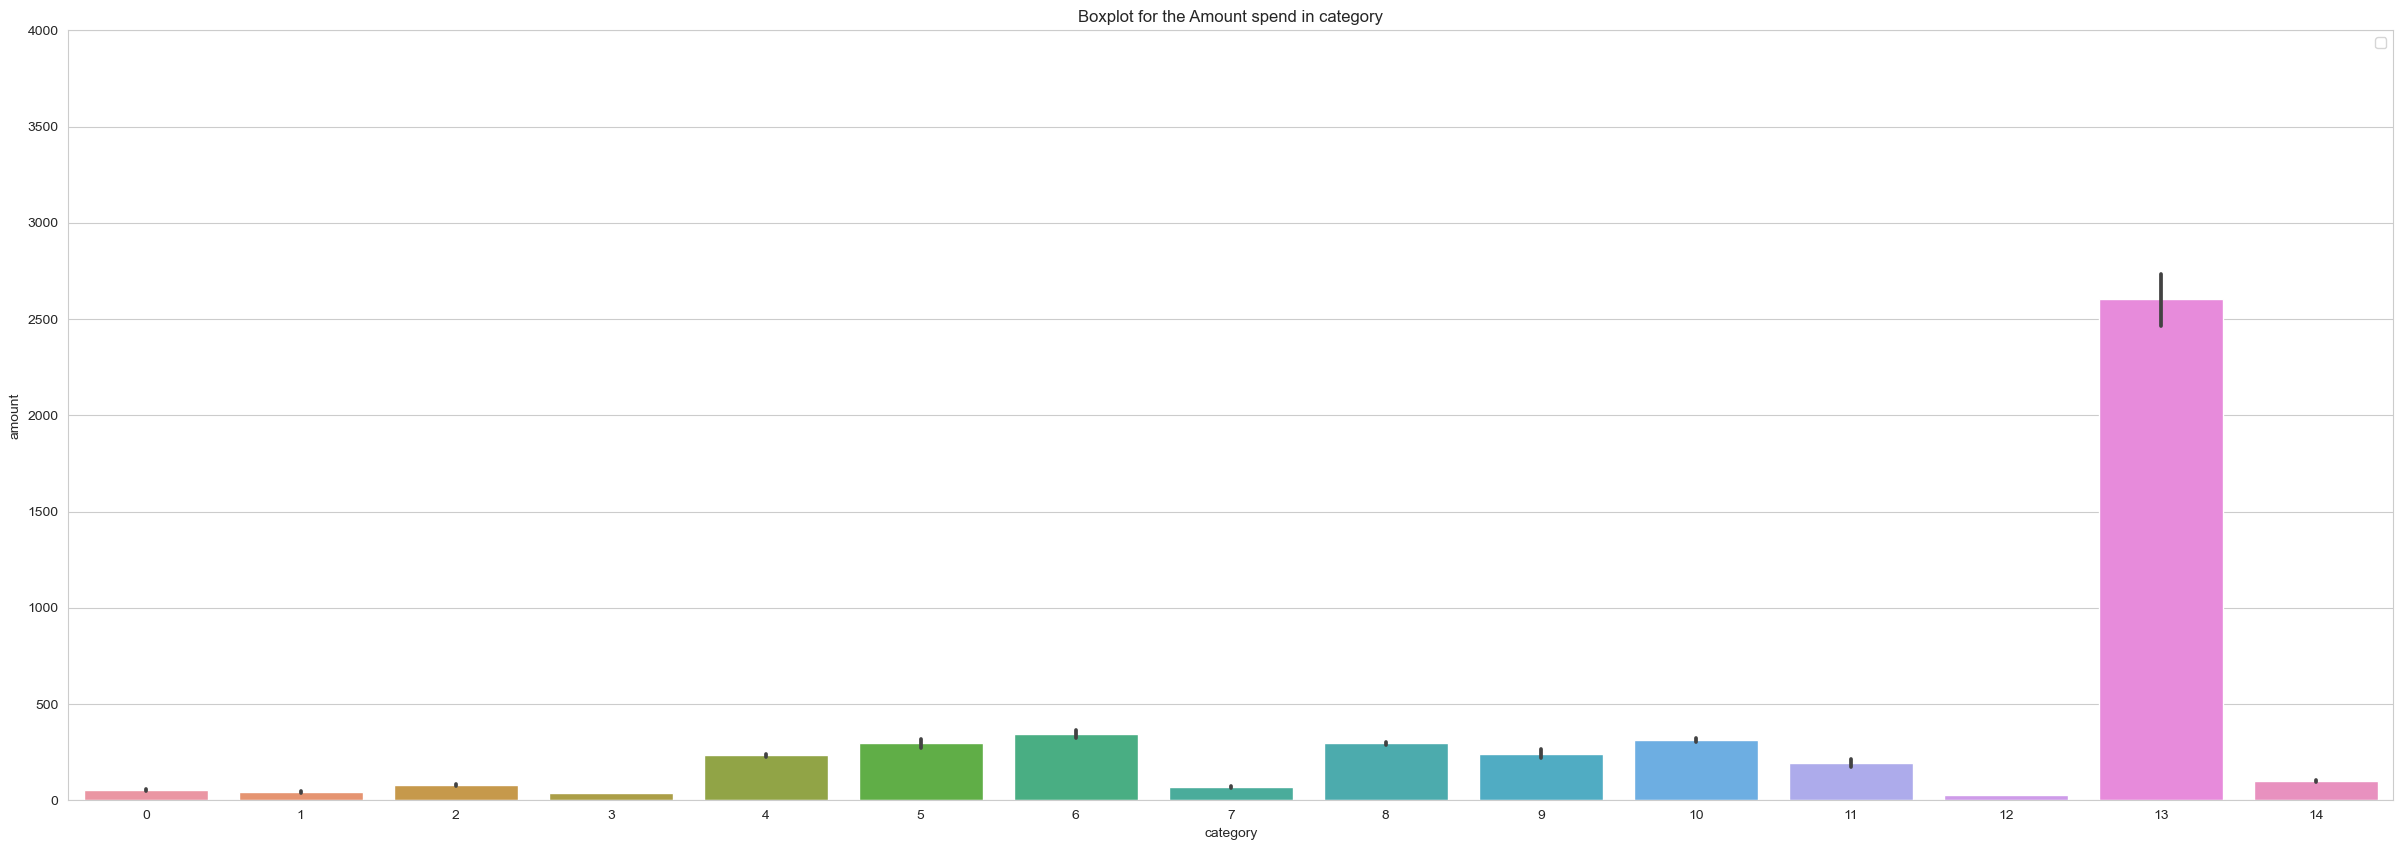

In [197]:
sns.set_style("whitegrid")
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(30,10))
sns.barplot(x=bankdata.category,y=bankdata.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

<Axes: xlabel='age'>

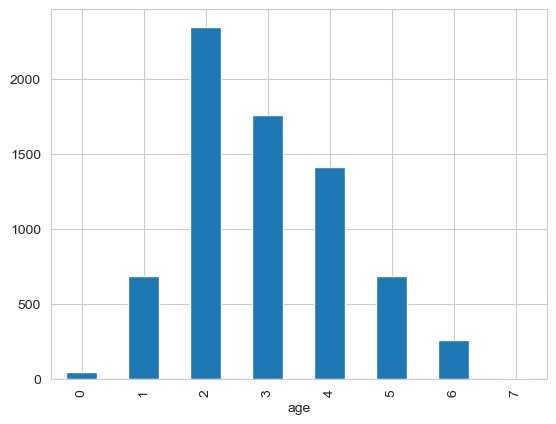

In [198]:
bankdata.groupby("age")["fraud"].sum().plot.bar()

# Splitting train and test data

In [152]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((71704, 7), (30731, 7), (71704,), (30731,))

# Normalization

In [199]:
#Performing scaling(Normalization)
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [200]:
#Displaying train data
x_train.head()

,0,1,2,3,4,5,6
0,0.340782,0.234177,0.571429,0.666667,0.918367,0.214286,0.006771
1,0.698324,0.819133,0.428571,0.333333,0.367347,0.857143,0.000339
2,0.312849,0.004869,0.142857,0.333333,0.612245,0.857143,0.005960
3,0.346369,0.125852,0.571429,0.333333,0.612245,0.857143,0.002996
4,0.905028,0.202775,0.714286,0.666667,0.367347,0.857143,0.008270


In [201]:
#Displaying test data
x_test.head()

,0,1,2,3,4,5,6
0,0.413408,0.634372,0.428571,0.333333,0.367347,0.857143,0.001058
1,0.770950,0.642162,0.571429,0.666667,0.367347,0.857143,0.008000
2,0.441341,0.143622,0.571429,0.666667,0.612245,0.857143,0.006808
3,0.430168,0.587634,0.142857,0.333333,0.918367,0.214286,0.002512
4,0.541899,0.418695,0.428571,0.333333,0.836735,1.000000,0.006936


# Bulding Algorithms

# KNN Algorithm

In [202]:
#load the dataset for KNN

KNN_Results=pd.read_csv(r"C:\Users\PUJITHA\Downloads\KNN_Results (1).csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 3048   312]
 [  496 26875]]
Outcome values : 
 3048 312 496 26875
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.91      0.88      3360
           0       0.99      0.98      0.99     27371

    accuracy                           0.97     30731
   macro avg       0.92      0.94      0.93     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 97.4 %
Precision : 86.0 %
Recall : 90.7 %
F1 Score : 0.883
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.4 %
MCC : 0
roc_auc_score: 0.945


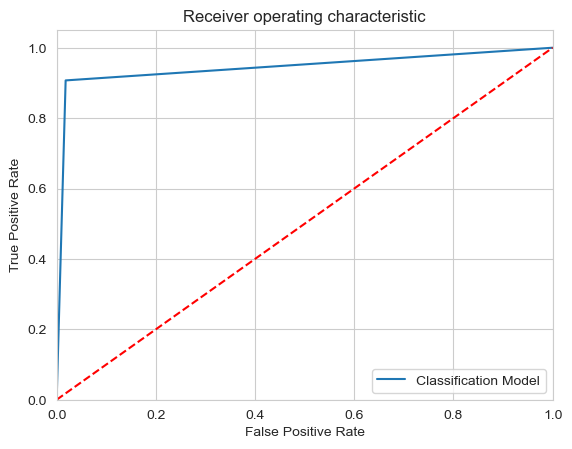

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 2686   674]
 [  334 27037]]
Outcome values : 
 2686 674 334 27037
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.80      0.84      3360
           0       0.98      0.99      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.93      0.89      0.91     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.7 %
Precision : 88.9 %
Recall : 79.9 %
F1 Score : 0.842
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 89.4 %
MCC : 0
roc_auc_score: 0.894


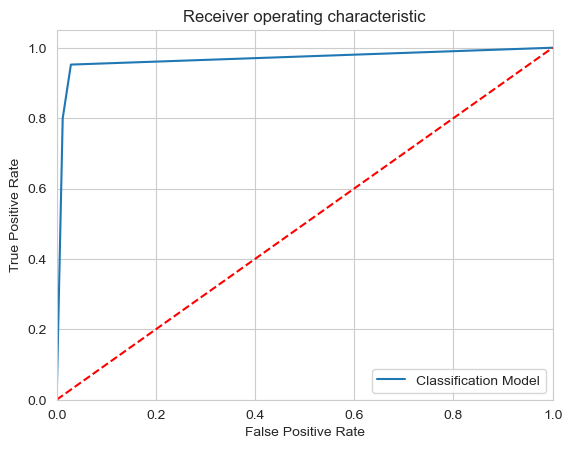

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 2988   372]
 [  571 26800]]
Outcome values : 
 2988 372 571 26800
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.89      0.86      3360
           0       0.99      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.91      0.93      0.92     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.9 %
Precision : 84.0 %
Recall : 88.9 %
F1 Score : 0.864
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 93.4 %
MCC : 0
roc_auc_score: 0.934


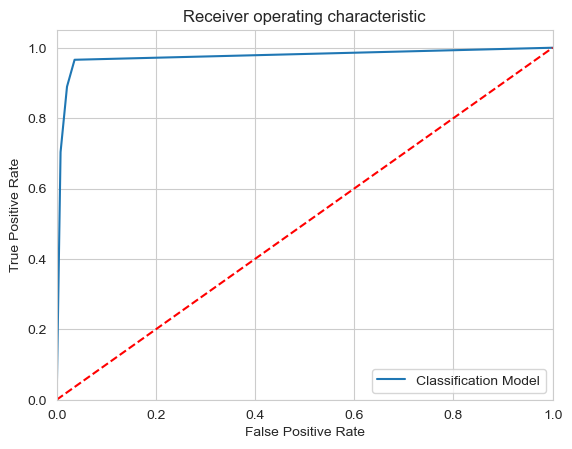

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 2777   583]
 [  403 26968]]
Outcome values : 
 2777 583 403 26968
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.83      0.85      3360
           0       0.98      0.99      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.93      0.91      0.92     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.8 %
Precision : 87.3 %
Recall : 82.6 %
F1 Score : 0.849
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 90.6 %
MCC : 0
roc_auc_score: 0.906


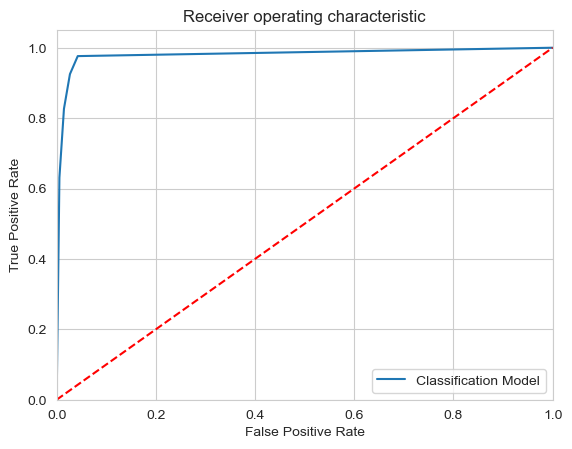

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2970   390]
 [  554 26817]]
Outcome values : 
 2970 390 554 26817
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.88      0.86      3360
           0       0.99      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.91      0.93      0.92     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.9 %
Precision : 84.3 %
Recall : 88.4 %
F1 Score : 0.863
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 93.2 %
MCC : 0
roc_auc_score: 0.932


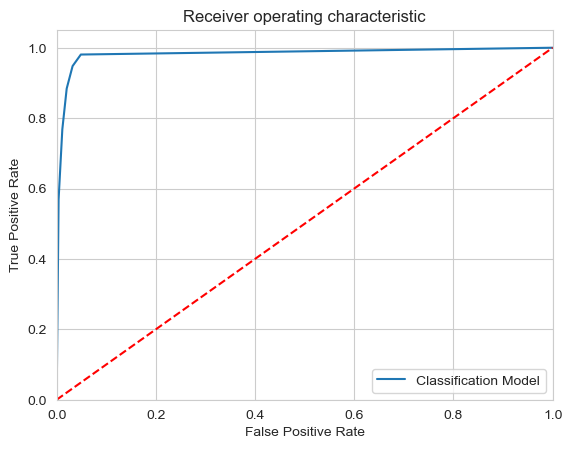

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 2815   545]
 [  450 26921]]
Outcome values : 
 2815 545 450 26921
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.84      0.85      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.92      0.91      0.92     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.8 %
Precision : 86.2 %
Recall : 83.8 %
F1 Score : 0.85
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 91.1 %
MCC : 0
roc_auc_score: 0.911


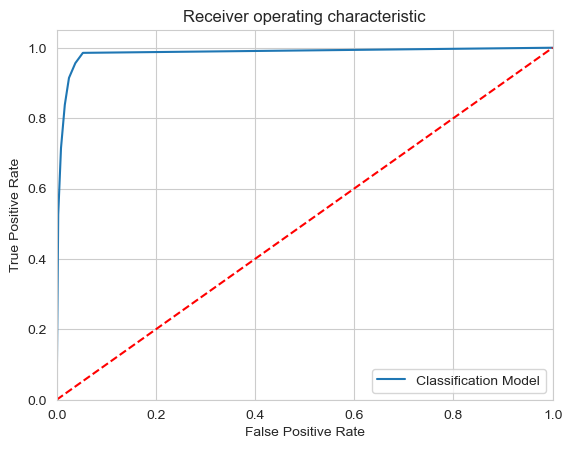

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 2953   407]
 [  564 26807]]
Outcome values : 
 2953 407 564 26807
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.88      0.86      3360
           0       0.99      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.91      0.93      0.92     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.8 %
Precision : 84.0 %
Recall : 87.9 %
F1 Score : 0.859
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 92.9 %
MCC : 0
roc_auc_score: 0.929


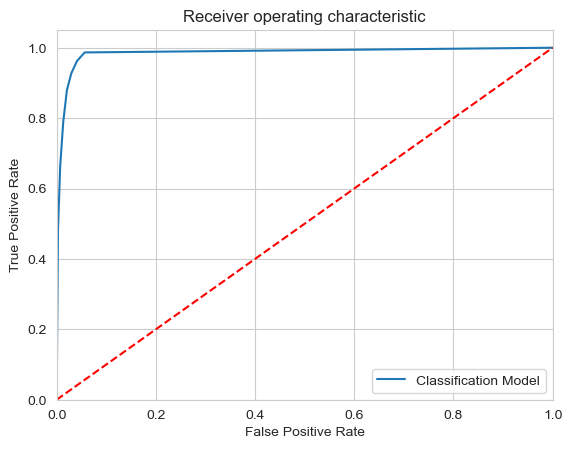

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 2782   578]
 [  463 26908]]
Outcome values : 
 2782 578 463 26908
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.83      0.84      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.92      0.91      0.91     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.6 %
Precision : 85.7 %
Recall : 82.8 %
F1 Score : 0.842
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 90.6 %
MCC : 0
roc_auc_score: 0.906


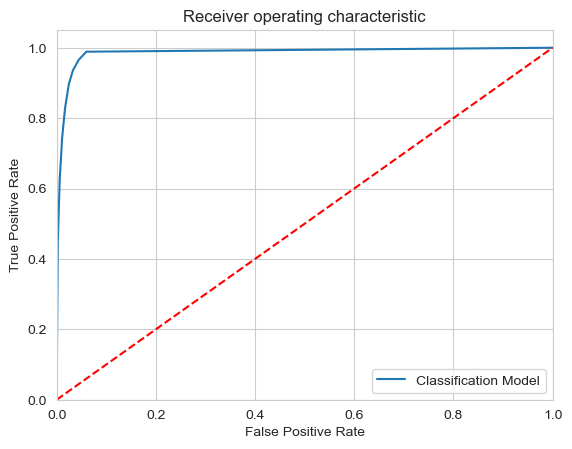

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 2878   482]
 [  562 26809]]
Outcome values : 
 2878 482 562 26809
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.86      0.85      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.97     30731
   macro avg       0.91      0.92      0.91     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 96.6 %
Precision : 83.7 %
Recall : 85.7 %
F1 Score : 0.846
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 91.8 %
MCC : 0
roc_auc_score: 0.918


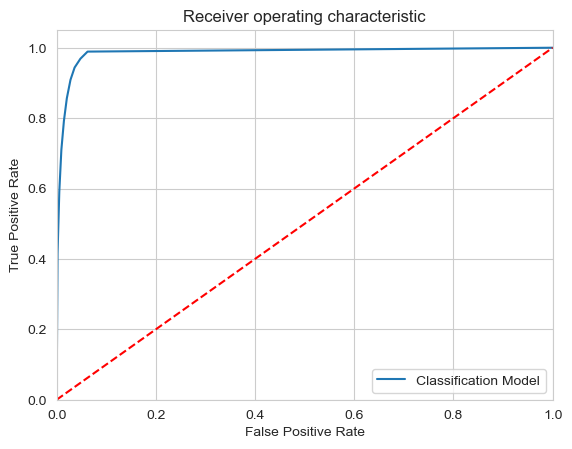

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 2765   595]
 [  494 26877]]
Outcome values : 
 2765 595 494 26877
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.84      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.5 %
Precision : 84.8 %
Recall : 82.3 %
F1 Score : 0.835
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 90.2 %
MCC : 0
roc_auc_score: 0.902


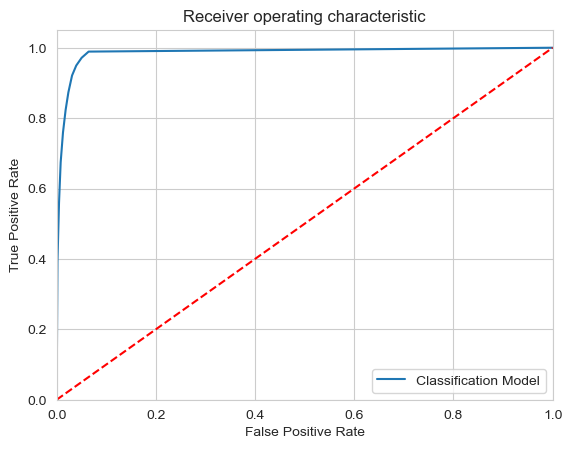

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 2833   527]
 [  562 26809]]
Outcome values : 
 2833 527 562 26809
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.91      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.5 %
Precision : 83.4 %
Recall : 84.3 %
F1 Score : 0.839
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 91.1 %
MCC : 0
roc_auc_score: 0.911


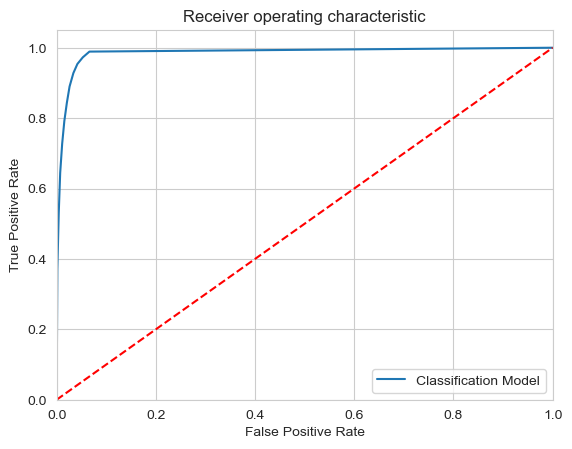

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 2749   611]
 [  490 26881]]
Outcome values : 
 2749 611 490 26881
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.83      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.4 %
Precision : 84.9 %
Recall : 81.8 %
F1 Score : 0.833
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 90.0 %
MCC : 0
roc_auc_score: 0.9


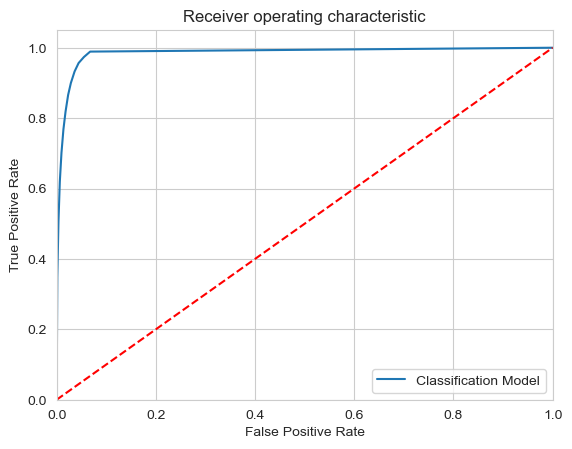

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 2816   544]
 [  561 26810]]
Outcome values : 
 2816 544 561 26810
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.91      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.4 %
Precision : 83.4 %
Recall : 83.8 %
F1 Score : 0.836
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 90.9 %
MCC : 0
roc_auc_score: 0.909


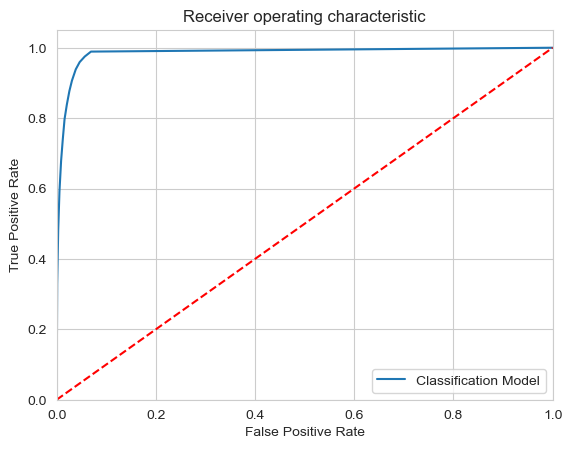

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 2739   621]
 [  495 26876]]
Outcome values : 
 2739 621 495 26876
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.83      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.4 %
Precision : 84.7 %
Recall : 81.5 %
F1 Score : 0.831
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 89.8 %
MCC : 0
roc_auc_score: 0.899


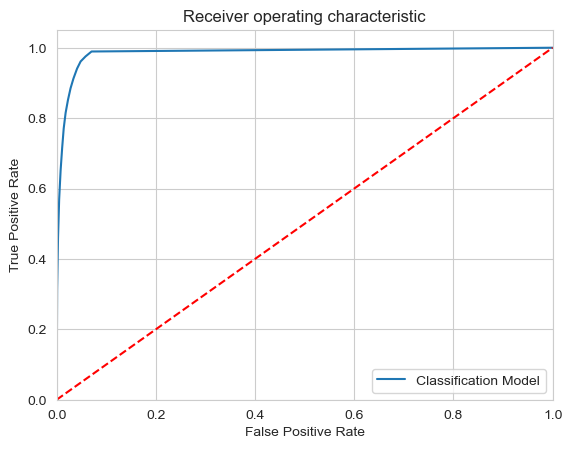

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 2789   571]
 [  562 26809]]
Outcome values : 
 2789 571 562 26809
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.91     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.3 %
Precision : 83.2 %
Recall : 83.0 %
F1 Score : 0.831
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 90.4 %
MCC : 0
roc_auc_score: 0.905


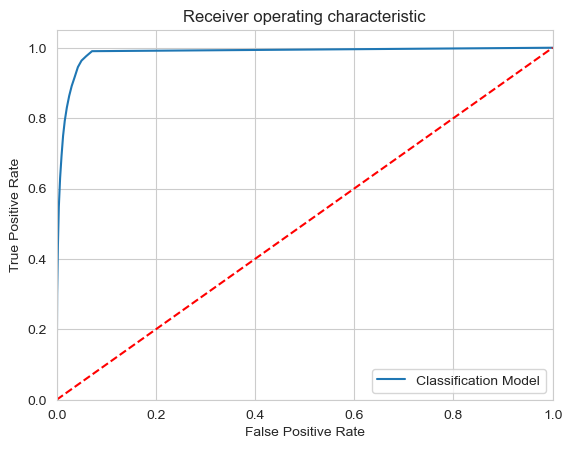

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 2716   644]
 [  501 26870]]
Outcome values : 
 2716 644 501 26870
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.81      0.83      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.90     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.3 %
Precision : 84.4 %
Recall : 80.8 %
F1 Score : 0.826
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 89.5 %
MCC : 0
roc_auc_score: 0.895


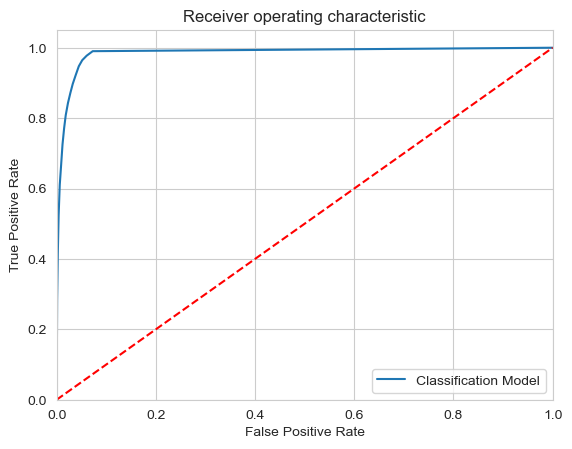

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 2759   601]
 [  549 26822]]
Outcome values : 
 2759 601 549 26822
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.82      0.83      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.90      0.90     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.3 %
Precision : 83.4 %
Recall : 82.1 %
F1 Score : 0.828
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 90.0 %
MCC : 0
roc_auc_score: 0.901


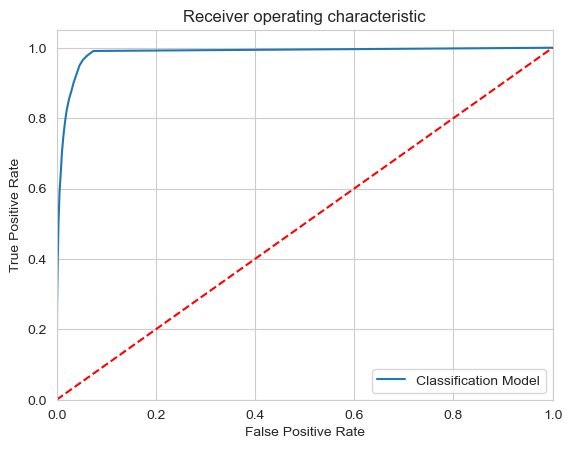

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 2701   659]
 [  509 26862]]
Outcome values : 
 2701 659 509 26862
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.80      0.82      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.89      0.90     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.2 %
Precision : 84.1 %
Recall : 80.4 %
F1 Score : 0.822
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 89.3 %
MCC : 0
roc_auc_score: 0.893


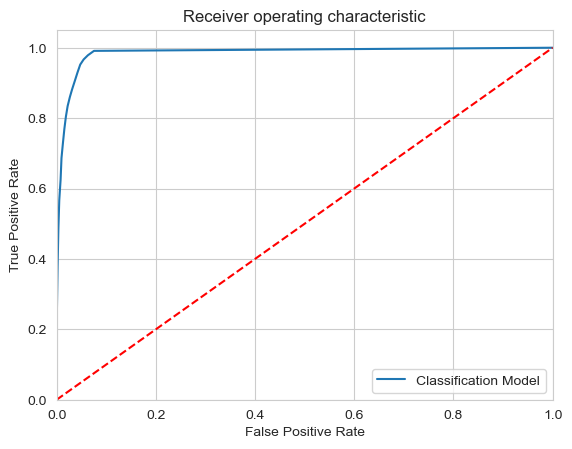

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 2747   613]
 [  556 26815]]
Outcome values : 
 2747 613 556 26815
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.82      0.82      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.90      0.90      0.90     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.2 %
Precision : 83.2 %
Recall : 81.8 %
F1 Score : 0.825
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 89.9 %
MCC : 0
roc_auc_score: 0.899


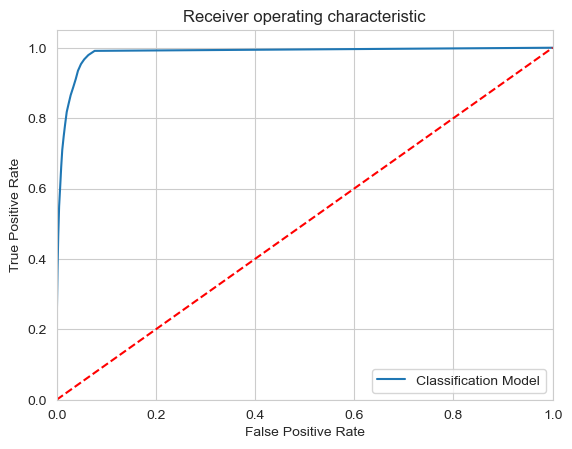

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 2677   683]
 [  511 26860]]
Outcome values : 
 2677 683 511 26860
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.80      0.82      3360
           0       0.98      0.98      0.98     27371

    accuracy                           0.96     30731
   macro avg       0.91      0.89      0.90     30731
weighted avg       0.96      0.96      0.96     30731

Accuracy : 96.1 %
Precision : 84.0 %
Recall : 79.7 %
F1 Score : 0.818
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 88.9 %
MCC : 0
roc_auc_score: 0.889


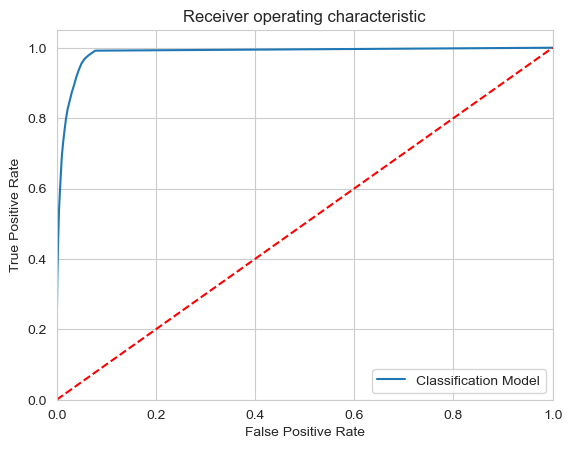

In [203]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [204]:
#Displaying KNN Results
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,3048,312,496,26875,0.974,0.860,0.907,0.883,0.982,0,0.944511,0.944
1,KNeighborsClassifier(n_neighbors=2),2,2686,674,334,27037,0.967,0.889,0.799,0.842,0.988,0,0.893601,0.894
2,KNeighborsClassifier(n_neighbors=3),3,2988,372,571,26800,0.969,0.840,0.889,0.864,0.979,0,0.934212,0.934
3,KNeighborsClassifier(n_neighbors=4),4,2777,583,403,26968,0.968,0.873,0.826,0.849,0.985,0,0.905882,0.906
4,KNeighborsClassifier(),5,2970,390,554,26817,0.969,0.843,0.884,0.863,0.980,0,0.931844,0.932
5,KNeighborsClassifier(n_neighbors=6),6,2815,545,450,26921,0.968,0.862,0.838,0.850,0.984,0,0.910678,0.911
6,KNeighborsClassifier(n_neighbors=7),7,2953,407,564,26807,0.968,0.840,0.879,0.859,0.979,0,0.929132,0.929
7,KNeighborsClassifier(n_neighbors=8),8,2782,578,463,26908,0.966,0.857,0.828,0.842,0.983,0,0.905530,0.906
8,KNeighborsClassifier(n_neighbors=9),9,2878,482,562,26809,0.966,0.837,0.857,0.846,0.979,0,0.918007,0.918
9,KNeighborsClassifier(n_neighbors=10),10,2765,595,494,26877,0.965,0.848,0.823,0.835,0.982,0,0.902434,0.902


# Compare the classification algorithms

In [206]:
#Load dataset for all  algorithms
EMResults=pd.read_csv(r"C:\Users\PUJITHA\Downloads\EMResults (1).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1815  1545]
 [   36 27335]]
Outcome values : 
 1815 1545 36 27335
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.54      0.70      3360
           0       0.95      1.00      0.97     27371

    accuracy                           0.95     30731
   macro avg       0.96      0.77      0.83     30731
weighted avg       0.95      0.95      0.94     30731

Accuracy : 94.9 %
Precision : 98.1 %
Recall : 54.0 %
F1 Score : 0.697
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 77.0 %
MCC : 0
roc_auc_score: 0.769


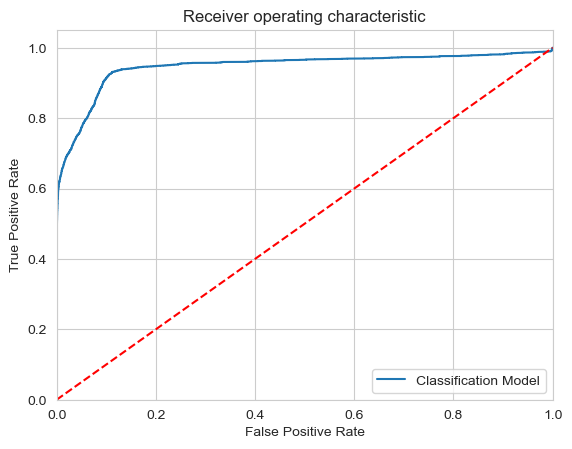

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 3108   252]
 [  340 27031]]
Outcome values : 
 3108 252 340 27031
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.93      0.91      3360
           0       0.99      0.99      0.99     27371

    accuracy                           0.98     30731
   macro avg       0.95      0.96      0.95     30731
weighted avg       0.98      0.98      0.98     30731

Accuracy : 98.1 %
Precision : 90.1 %
Recall : 92.5 %
F1 Score : 0.913
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 95.6 %
MCC : 0
roc_auc_score: 0.956


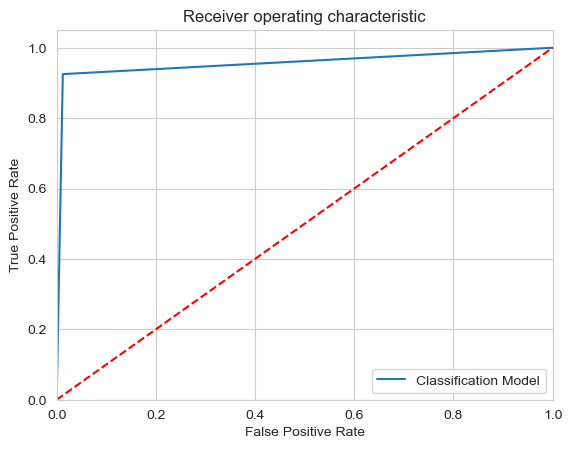

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 3195   165]
 [  224 27147]]
Outcome values : 
 3195 165 224 27147
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94      3360
           0       0.99      0.99      0.99     27371

    accuracy                           0.99     30731
   macro avg       0.96      0.97      0.97     30731
weighted avg       0.99      0.99      0.99     30731

Accuracy : 98.7 %
Precision : 93.4 %
Recall : 95.1 %
F1 Score : 0.943
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 97.2 %
MCC : 0
roc_auc_score: 0.971


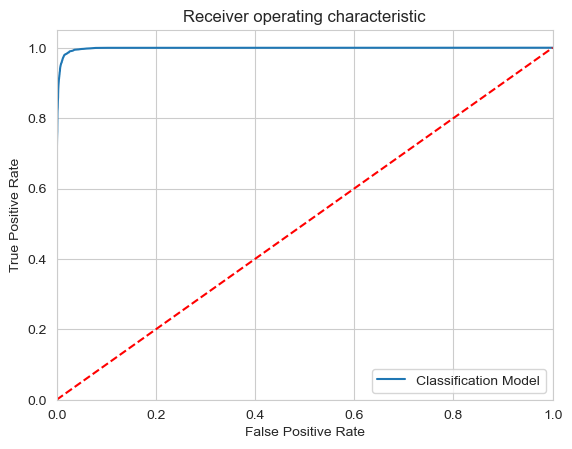

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 3200   160]
 [  216 27155]]
Outcome values : 
 3200 160 216 27155
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.95      0.94      3360
           0       0.99      0.99      0.99     27371

    accuracy                           0.99     30731
   macro avg       0.97      0.97      0.97     30731
weighted avg       0.99      0.99      0.99     30731

Accuracy : 98.8 %
Precision : 93.7 %
Recall : 95.2 %
F1 Score : 0.945
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 97.2 %
MCC : 0
roc_auc_score: 0.972


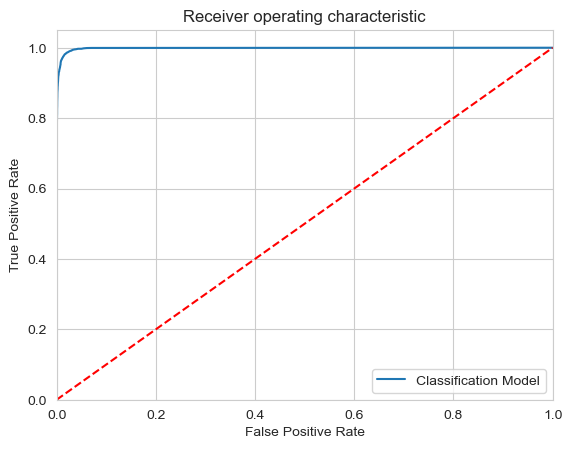

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 3048   312]
 [  496 26875]]
Outcome values : 
 3048 312 496 26875
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.91      0.88      3360
           0       0.99      0.98      0.99     27371

    accuracy                           0.97     30731
   macro avg       0.92      0.94      0.93     30731
weighted avg       0.97      0.97      0.97     30731

Accuracy : 97.4 %
Precision : 86.0 %
Recall : 90.7 %
F1 Score : 0.883
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.4 %
MCC : 0
roc_auc_score: 0.945


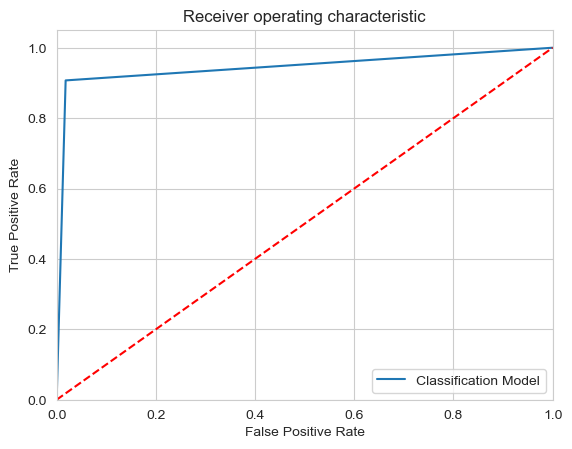

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 2777   583]
 [ 1187 26184]]
Outcome values : 
 2777 583 1187 26184
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.83      0.76      3360
           0       0.98      0.96      0.97     27371

    accuracy                           0.94     30731
   macro avg       0.84      0.89      0.86     30731
weighted avg       0.95      0.94      0.94     30731

Accuracy : 94.2 %
Precision : 70.1 %
Recall : 82.6 %
F1 Score : 0.758
Specificity or True Negative Rate : 95.7 %
Balanced Accuracy : 89.2 %
MCC : 0
roc_auc_score: 0.892


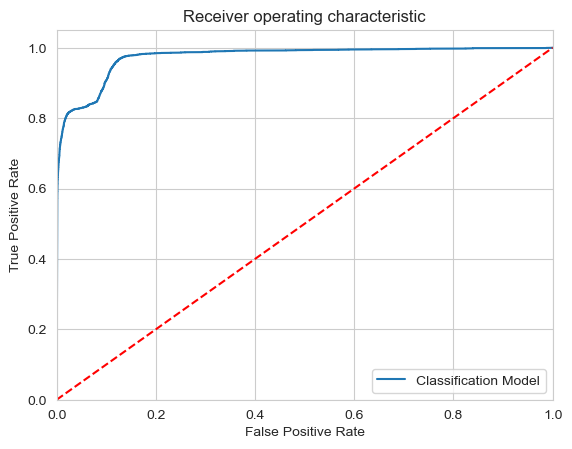

-----------------------------------------------------------------------------------------------------


In [208]:
# Build the Classification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN,ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




In [209]:
#Displaying EMResults data
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1815,1545,36,27335,0.949,0.981,0.540,0.697,0.999,0,0.769432,0.770
1,DecisionTreeClassifier(),3107,253,343,27028,0.981,0.901,0.925,0.912,0.987,0,0.956085,0.956
2,"(DecisionTreeClassifier(max_features='sqrt', r...",3191,169,233,27138,0.987,0.932,0.950,0.941,0.991,0,0.970595,0.970
3,LogisticRegression(),1815,1545,36,27335,0.949,0.981,0.540,0.697,0.999,0,0.769432,0.770
4,DecisionTreeClassifier(),3108,252,340,27031,0.981,0.901,0.925,0.913,0.988,0,0.956289,0.956
5,"(DecisionTreeClassifier(max_features='sqrt', r...",3195,165,224,27147,0.987,0.934,0.951,0.943,0.992,0,0.971355,0.972
6,"(ExtraTreeClassifier(random_state=1620121081),...",3200,160,216,27155,0.988,0.937,0.952,0.945,0.992,0,0.972245,0.972
7,KNeighborsClassifier(n_neighbors=1),3048,312,496,26875,0.974,0.860,0.907,0.883,0.982,0,0.944511,0.944
8,GaussianNB(),2777,583,1187,26184,0.942,0.701,0.826,0.758,0.957,0,0.891561,0.892


# Extra Trees Algorithm

In [210]:
#Predicting target variable(fraud) by applying test data
y_predET=ModelET.predict(x_test)

In [211]:
Results = pd.DataFrame({'fraud_A':y_test, 'fraud_P':y_predET})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = bankdata.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(10)

,step,customer,age,gender,merchant,category,amount,fraud,fraud_A,fraud_P
43178,177,835,4,1,29,12,27.96,0,0,0
46085,164,2818,3,2,17,12,67.78,0,0,0
45009,176,1987,2,2,29,12,36.77,0,0,0
28046,95,3746,2,1,17,12,53.54,0,0,0
57488,145,359,3,1,17,12,13.59,0,0,0
12032,98,3633,1,2,29,12,11.63,0,0,0
39904,91,1302,3,1,17,12,25.27,0,0,0
7318,177,918,2,2,17,12,38.96,0,0,0
63795,68,3895,5,1,29,12,39.57,0,0,0
38156,118,3793,3,1,17,12,9.86,0,0,0
